# Project on Prediction of Loan Eligibility using Machine Learning.

In [1]:
#Importing the required labraries and dataset.

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
loan_data=pd.read_csv("loan.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Result: All the labraries and dataset are imported successfully.**

In [2]:
#Finding the no of rows and column in the dataset.
loan_data.shape

(614, 13)

**Result: There are 614 people are there who are applying the loan.**

In [3]:
#Fnding the statistical measures 
loan_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Result:By using the describe function we calculate the statistical measures of the numerical data and the categorical datas are ignored.**

In [4]:
#Finding the missing value of the dataset.
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Result: We can see there are some missing value present in our dataset so wee need to remove the missing value.**

In [5]:
#Droping/Removing the missing value.
data=loan_data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Result: Hence we removed the missing value in the dataset.**

In [7]:
#Data Visualization.
data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}, ylabel='Loan_Status'>

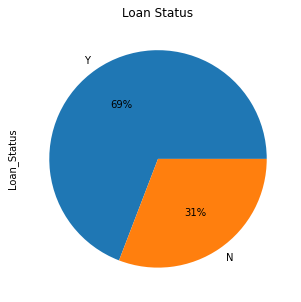

In [8]:
data['Loan_Status'].value_counts(normalize=True).plot.pie(title='Loan Status',autopct='%1.0f%%',figsize=(5,5))

**Result: Out of 614 people only the loan of 422 were approved(ie.69%).**

**Now, let's visualize each variable separately.**

**Different types of variables are Categorical, ordinal, and numerical.**

**Categorical features**: (Gender, Married, Self_Employed, Credit_History, Loan_Status)

**Ordinal features**: (Dependents, Education, Property_Area)

**Numerical features**: (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term.

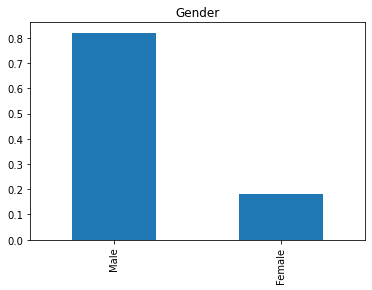

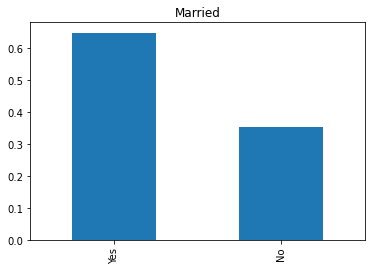

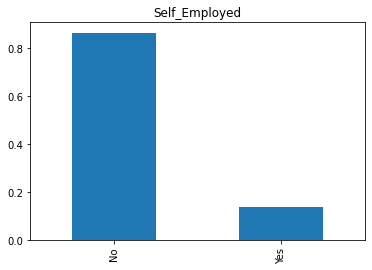

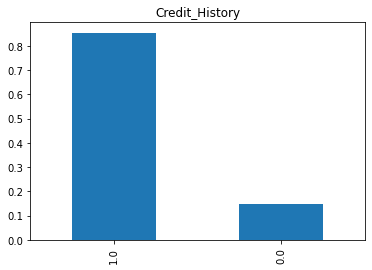

In [9]:
#Categorical Features
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()




**Result: From the above figure
  80% of applicants in the dataset are male.
  Around 65% of the applicants in the dataset are married.
  Around 15% of applicants in the dataset are self-employed.
  Around 85% of applicants have repaid their doubts.**

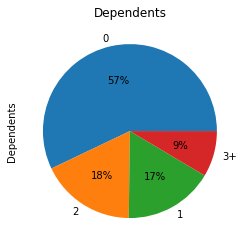

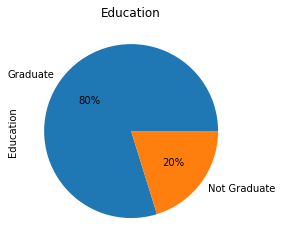

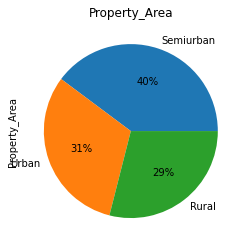

In [10]:
#Ordinal Features
data['Dependents'].value_counts(normalize=True).plot.pie(title='Dependents',autopct='%1.0f%%')
plt.show()
data['Education'].value_counts(normalize=True).plot.pie(title='Education',autopct='%1.0f%%')
plt.show()
data['Property_Area'].value_counts(normalize=True).plot.pie(title='Property_Area',autopct='%1.0f%%')
plt.show()


**Result:
Most of the applicants don't have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from the Semiurban area.**

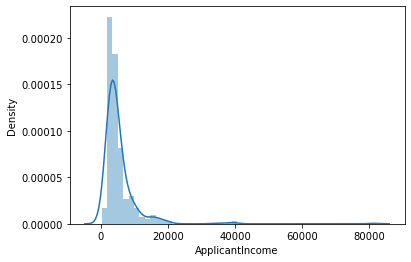

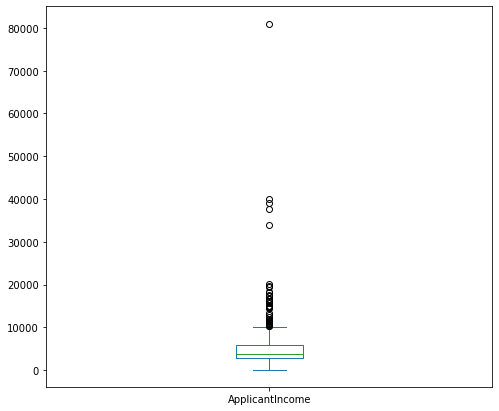

In [11]:
#Numerical Features
sns.distplot(data['ApplicantIncome'])
plt.show()
data['ApplicantIncome'].plot.box(figsize=(8,7))
plt.show()



**Result: It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed.**
 In the box plot we can see there is a presence of outliers

Text(0.5, 0.98, '')

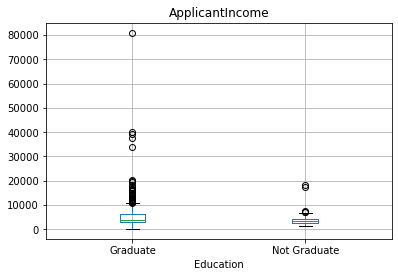

In [12]:
data.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

**Result: we can see there are higher no of graduates with very high income which is seen as an outliers.**

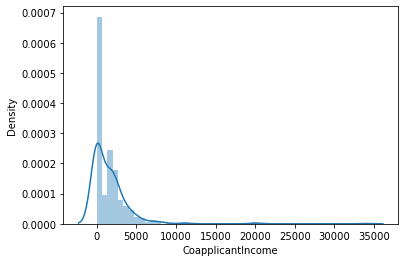

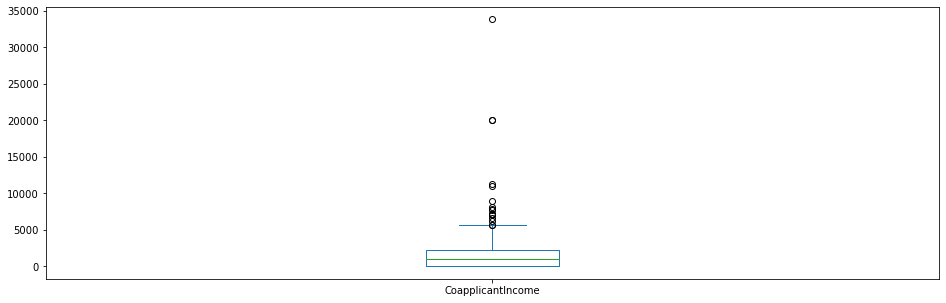

In [13]:
sns.distplot(data['CoapplicantIncome'])
plt.show()
data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


**Result:- We can see the majority of co-applicant income ranges from 0-5000 and also we see a lot of outliers in applicant income but its no normally distributed.**

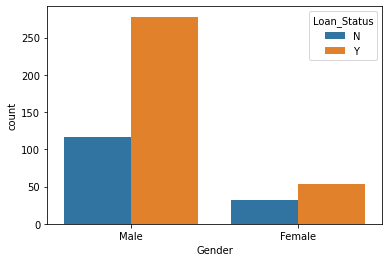

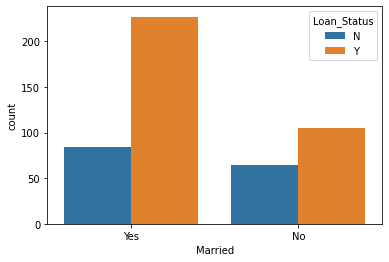

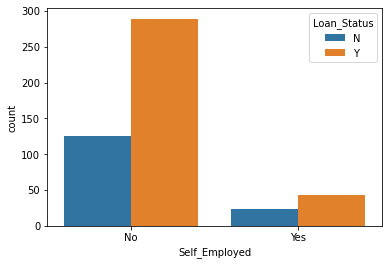

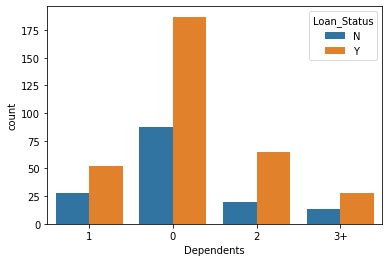

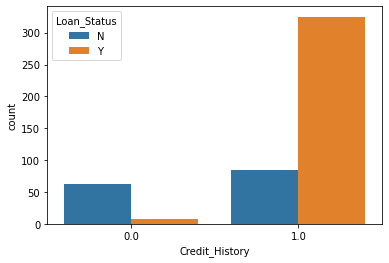

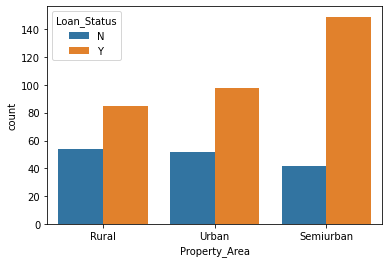

In [14]:
#Bivariate Analysis
#Categorical vs Target Variable
sns.countplot(data['Gender'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Married'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Dependents'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
plt.show()

**Result:In the graph we can see in the Males are getting aproved for loan more than females.
Married people have more chances to get approval for loan.
The people who is not self employed have more chances of getting the loan.
The people with no dependency have more chances of getting the loan.
The people who lives in semiurban areas has more chances of getting the loan**


In [15]:
#MAchine Learning
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
#Label Encoding(Converting categorical column into numerical)
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [17]:
data['Married']=data['Married'].map({'Yes':1,'No':0})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})

In [20]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})


In [21]:
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})


In [22]:
data[ 'Loan_Status']=data[ 'Loan_Status'].map({'Y':1,'N':0})

In [23]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


**Result:Hence all the categorica values are converted into numerical values i.e 0 and 1**

In [24]:
#Corelation Matrix
corr=data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.209408,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.359132,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.209408,0.359132,1.000000,-0.031106,0.034973,0.142074,-0.004606,0.170318,-0.095554,-0.036777,-0.020823,0.028199
Education,-0.059245,-0.001652,-0.031106,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005,0.068437
Self_Employed,-0.002761,0.015674,0.034973,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.142074,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.004606,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.170318,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.095554,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.036777,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


<AxesSubplot:>

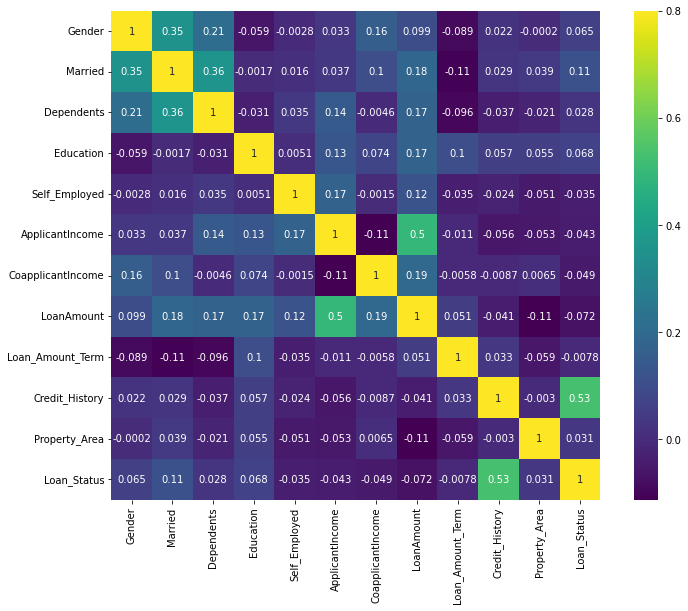

In [25]:
matrix=data.corr()
f , ax = plt.subplots(figsize=(12,9))
sns.heatmap(matrix,vmax=.8,square=True,cmap="viridis",annot=True)

**Result: From above heatmap, we can see that the LoanAmount and ApplicantIncome are correlated to each other.**

   **Credit_History and Loan_Status are correlated to each other.**

In [26]:
#Dropping the Values.
data.drop(['Loan_ID','Gender','Married','Education','Property_Area'],axis=1,inplace=True)

In [56]:
data

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,3000,0.0,66.0,360.0,1.0,1
3,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,6000,0.0,141.0,360.0,1.0,1
5,2,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.0,360.0,1.0,1
610,4,0,4106,0.0,40.0,180.0,1.0,1
611,1,0,8072,240.0,253.0,360.0,1.0,1
612,2,0,7583,0.0,187.0,360.0,1.0,1


In [57]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [59]:
#Logistic Regression Algorithm.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [60]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
predicted=model.predict(xtest)

In [62]:
newresult=model.predict([[2,1,5417,4196.0,267.0,360.0,1.0]])
print(newresult)

[1]


**[1] mean the Loan Status is Yes**

In [63]:
model.score(xtrain,ytrain)

0.8035714285714286

In [64]:
model.score(xtest,ytest)

0.8194444444444444

In [65]:
from sklearn.metrics import * 
print(confusion_matrix(ytest,predicted))

[[22 24]
 [ 2 96]]


In [66]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63        46
           1       0.80      0.98      0.88        98

    accuracy                           0.82       144
   macro avg       0.86      0.73      0.75       144
weighted avg       0.84      0.82      0.80       144



In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [39]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
DTClassifier.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
predicted=DTClassifier.predict(xtest)

In [42]:
newresult=DTClassifier.predict([[0,1,4583,0.0,133.0,360.0,0.0]])
print(newresult)

[0]


In [43]:
DTClassifier.score(xtrain,ytrain)

1.0

In [44]:
DTClassifier.score(xtest,ytest)

0.6666666666666666

In [45]:
from sklearn.metrics import * 
print(confusion_matrix(ytest,predicted))

[[13 16]
 [16 51]]


In [46]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45        29
           1       0.76      0.76      0.76        67

    accuracy                           0.67        96
   macro avg       0.60      0.60      0.60        96
weighted avg       0.67      0.67      0.67        96



In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFClassifier=RandomForestClassifier(criterion='entropy',random_state=0)
RFClassifier

RandomForestClassifier(criterion='entropy', random_state=0)

In [49]:
RFClassifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=0)

In [50]:
predicted=RFClassifier.predict(xtest)

In [51]:
newresult=RFClassifier.predict([[4,0,4106,0.0,40.0,180.0,1.0]])
print(newresult)

[1]


In [52]:
RFClassifier.score(xtrain,ytrain)

1.0

In [53]:
RFClassifier.score(xtest,ytest)

0.8020833333333334

In [54]:
from sklearn.metrics import * 
print(confusion_matrix(ytest,predicted))

[[12 12]
 [ 7 65]]


In [55]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        24
           1       0.84      0.90      0.87        72

    accuracy                           0.80        96
   macro avg       0.74      0.70      0.72        96
weighted avg       0.79      0.80      0.79        96



**Conclusion: From the above machine learning techniques we can see that Logistic Regression & Random Forest is better than Decision Tree. Hence they can be used for the validation and verification purposes.**